In [99]:
import tabpy_client
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import json

client = tabpy_client.Client('http://localhost:9004/')

In [100]:
movie_reviews_data_folder = r'C:\Users\Administrator\nltk_data\corpora\movie_reviews'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


In [101]:
x_train, x_test, y_train, y_test = train_test_split(
       dataset.data, dataset.target, test_size=0.25, random_state=None)

In [102]:
dataset.target_names

['neg', 'pos']

In [103]:
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

In [104]:
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [105]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.02


In [106]:
y_predicted = grid_search.predict(x_test)

In [107]:
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.85      0.85      0.85       254
        pos       0.85      0.85      0.85       246

avg / total       0.85      0.85      0.85       500



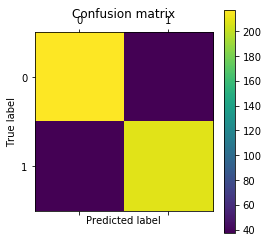

[[217  37]
 [ 37 209]]


In [108]:
cm = metrics.confusion_matrix(y_test, y_predicted)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(cm)

# Trying classifier on test data

In [109]:
reviews_new = ['This movie was excellent and very good', 'Absolute joy ride', 
            'Steven Seagal was terrible', 'Steven Seagal shined through.', 
              'This was certainly a movie', 'Two thumbs up', 'I fell asleep halfway through', 
              "We can't wait for the sequel!!", '!', '?', 'I cannot recommend this highly enough', 
              'instant classic.', 'Steven Seagal was amazing. His performance was Oscar-worthy.',
              'This project is the best of the year',
              'This project sucks']

def predict(data):
    predict = grid_search.predict(data)
    scores = []
    for review, category in zip(data, predict):
         scores.append(str(category))
    return scores

client.deploy('predict', predict, 'Send an array to predict sentiment', override=True)

In [110]:
client.query('predict', reviews_new)

{'model': 'predict',
 'response': ['1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0',
  '1',
  '0'],
 'uuid': 'be4d7642-83a9-4bbc-8ff9-1a3940d7aab5',
 'version': 28}

In [93]:
def test(text):
    return text

client.deploy('test', test, 'print text passing', override=True)